# Scipy

- numpy는 low level만 제공
- **scpiy** : numpy기반으로 필요한 기능 미리 만듬

- from scipy import ndimage  ->  쉽게 영상 처리할 수 있다.
- from skimage(scikit-image) : 편한 툴
- PIL : python 이미지 library -> tensorflow, pytorch 처리용
- opencv : 비전 library

- 조금씩 다르고 서로 없는거도 있음.
- scipy는 안배워도...scikit으로 다 넘김.

- numpy, scikit image, PIL, opencv 를 배워야 함!

</br>

## 영상 처리

### 데이터 확보

#### numpy 기반 라이브러리 전처리
- 영상 자체를 numpy에서 읽고 쓸 수 있는 포맷으로 바꾸기(ndarray)


**1. matplotlib**

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # 이미지 확인, 불러오기 위해(가장 쉬움)
jang = plt.imread("1.jpg") # image를 array로 

In [3]:
jang

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[199, 218, 224],
        [186, 205, 211],
        [178, 195, 202],
        ...,
        [ 76,  79,  98],
        [ 76,  79,  98],
        [ 78,  81, 100]],

       [[196, 215, 221],
        [186, 205, 211],
        [194, 211, 218],
        ...,
        [109, 112, 131],
        [105, 108, 127],
        [103, 106, 125]],

       [[168, 187, 193],
        [146, 165, 171],
        [174, 191, 198],
        ...,
        [129, 132, 151],
        [121, 124, 143],
        [116, 119, 138]]

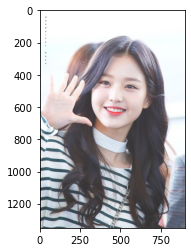

In [4]:
plt.imshow(jang); # numpy를 image로 보여주기
# ; 하면 output 안나와

([], [])

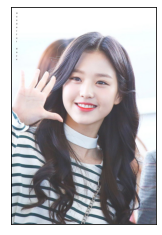

In [5]:
plt.imshow(jang)
plt.xticks([])
plt.yticks([]) # 좌표 사라짐
# plt.axis('off')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

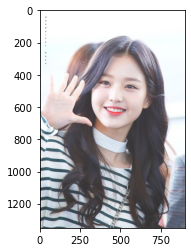

In [6]:
plt.imshow(jang)
plt.xticks(None) # 첫 번째 None인데 다르게 나온다...

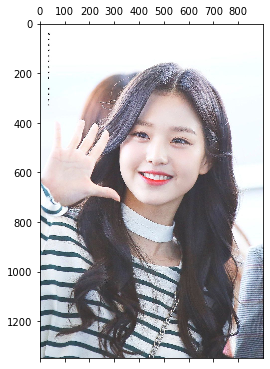

In [7]:
plt.matshow(jang)

**2. imageio**

- scipy ndimage를 새롭게 만든 이미지 입출력 도구
- image에 효율적인 새로운 numpy 구조

- matplotlib에서 다양한 file 포맷을 못 불러오는 경우 imageio로 할 수 있다.

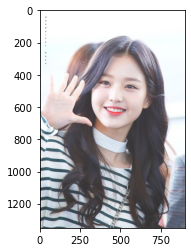

In [8]:
from imageio import imread
jang2 = imread("1.jpg") 
plt.imshow(jang2)

In [9]:
issubclass(type(jang2), np.ndarray) # 상속받아서 재정의한 것

True

In [10]:
jang2.__array_interface__  # 구조보기, numpy 호환

{'data': (2105595453504, False),
 'strides': None,
 'descr': [('', '|u1')],
 'typestr': '|u1',
 'shape': (1350, 900, 3),
 'version': 3}

**3. skimage**

- scipy ndimage를 새롭게 만든 이미지 입출력 도구
- image에 효율적인 새로운 numpy 구조

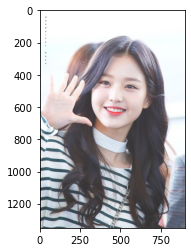

In [11]:
from skimage import io
jang3 = io.imread("1.jpg") 
plt.imshow(jang3)

In [12]:
print(np.array_equal(jang, jang2))
print(np.array_equal(jang2, jang3)) # type은 다르지만 값은 같다.

True
True


- 이미지를 한개한개 불러들일때

    **-> shape, dtype을 일치시켜야 함!**
    
- 다를 경우 resize, crop  ->  numpy로 한다

### crop
- 특정 영역을 버린다고 할 수 있다.

### numpy의 slicing

In [13]:
a = np.arange(24).reshape(4,6)
a[1:3,2:4] # comma slicing

array([[ 8,  9],
       [14, 15]])

In [14]:
a[a>3] # boolean indexing

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23])

In [15]:
a[(1,2),(2,3)]

array([ 8, 15])

In [16]:
a[[2,3]] # fancy indexing

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [17]:
a[1,...] # ...indexing

array([ 6,  7,  8,  9, 10, 11])

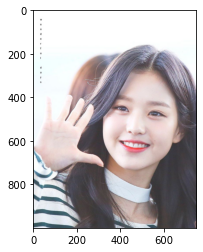

In [18]:
jang4 = jang3[:1000,:750,:]
plt.imshow(jang4)

색상 -> 3가지 channel 이라 할 수 있음

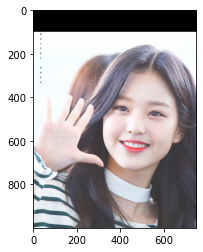

In [19]:
jang3[:100,:,:]=0
plt.imshow(jang4)

In [20]:
jang4.base is jang3.base # 메모리 공유를 해버림(mutable 단점)
# .copy를 붙여야 됨

True

### resize

- reshape은 모양을 다르게 한다. -> size는 같아야 함
- resize는 개수를 다르게 한다.

In [21]:
np.resize(a,(2,3)) # 2*3형태로 size를 바꾼다.
# function 방식

array([[0, 1, 2],
       [3, 4, 5]])

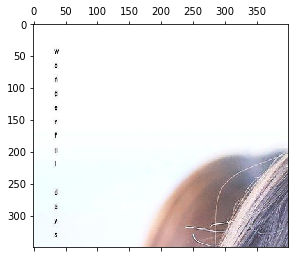

In [25]:
from skimage.util import crop
plt.matshow(crop(jang,((0,1000),(0,500),(0,0))))

### copy

- 2차원 이상일 때 deepcopy

- view(shallow) : 메모리 공유하고 변경해야할 때
- copy(deep) : 공유 X

**2차원 이상**
- copy(shallow)
- copy.deepcopy

- 텐서에서 X

In [26]:
b=a=[1,2,3] 
c=b.copy()
b[0]=100
a,b,c

([100, 2, 3], [100, 2, 3], [1, 2, 3])

In [27]:
x=[[1,2],[3,4]]
y=x.copy()
x[0][0]=10000
x,y

([[10000, 2], [3, 4]], [[10000, 2], [3, 4]])

In [28]:
import copy

x=[[1,2],[3,4]]
y=copy.deepcopy(x)
x[0][0]=10000
y 

[[1, 2], [3, 4]]

In [29]:
s1 = jang2.copy()
s2 = jang2.copy()

In [30]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(3,4)
np.concatenate((a,b))  # row로 붙이기 , vstack, np.r__   -> 똑같음 (중복되는게 많아)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
np.concatenate((a,b),axis=1) # column, hstack, np.c__

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [32]:
np.stack((a,b))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [33]:
np.stack((a,b)).shape

(2, 3, 4)

In [34]:
np.dstack((a,b))  # 3차원 되긴했는데 각각을 새로운 차원으로

array([[[ 0,  0],
        [ 1,  1],
        [ 2,  2],
        [ 3,  3]],

       [[ 4,  4],
        [ 5,  5],
        [ 6,  6],
        [ 7,  7]],

       [[ 8,  8],
        [ 9,  9],
        [10, 10],
        [11, 11]]])

- close form 알고리즘...?


#### 크기 문제

- 공통적인 부분만 있으면 중요한 정보가 없어져서 큰 범위에 맞춘다.


In [35]:
a = np.arange(28*28).reshape(28,28)
b = np.arange(28*28).reshape(28,28)

In [36]:
a = a.reshape(28,28,1)
b = b.reshape(28,28,1)

In [37]:
np.stack((a,b)).shape

(2, 28, 28, 1)

In [38]:
from sklearn.datasets import load_iris
data = load_iris()
aa = data.data
bb = data.target

In [39]:
bb = bb.reshape(-1,1)
np.hstack((aa,bb))

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

### data와 target을 붙이는 이유

- train, label 나누기
- EDA 편리